# **Auswertung von Simulationen**

Inhaltesverzeichnis

1. [Erstellen der Simulationen](#erstellen-der-simulation)
2. [Auswertung der Simulationen](#auswertung-der-simulation)

# Importe

In [2]:
### Jupyter Einstellungen
%load_ext autoreload
%autoreload 2

In [3]:
### Python Packages
import re
import os
import datetime as dt
import pandas as pd
import scipy.stats as st
from scipy.stats import norm, lognorm, uniform, qmc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
from src.preprocessing import getData, getAMB
from src import style
from src import toolbox as tb
from sklearn.metrics import r2_score
from src import trnpy

In [5]:
style.clrs

[(0.2870588235294118, 0.48156862745098034, 0.5756862745098039),
 (0.7109803921568627, 0.36588235294117644, 0.28117647058823525),
 (0.2886274509803921, 0.4329411764705882, 0.4329411764705883),
 (0.891764705882353, 0.687843137254902, 0.30823529411764694),
 (0.6572549019607843, 0.5192156862745099, 0.6196078431372549),
 (0.10901960784313725, 0.1749019607843137, 0.2282352941176471)]

Öffne gespeicherte Varianten

In [6]:
Simulationen = trnpy.VariantCollection()
Simulationen.open()
Simulationen()

,bui,WeatherFile,IntGain,Tset,WindowRatio,IntWall_L,IntWall_H,ExtWall,Floor,Ceiling,Laibung,WindowID,ActiveLayer,THB
Name,,,,,,,,,,,,,,
TRNPY_TEMPLATE_0,LB,MUC_2020.epw,37.5,16.5,0.219,LB_IW_L,LB_IW_H,LB_AW,BO,DA,0.50,3307,0,0.018
TRNPY_TEMPLATE_1,LB,MUC_2020.epw,3.0,21.5,0.210,LB_IW_L,LB_IW_H,LB_AW,BO,DA,0.50,3307,0,0.018
TRNPY_TEMPLATE_2,LB,MUC_2020.epw,28.6,22.0,0.154,LB_IW_L,LB_IW_H,LB_AW,BO,DA,0.50,3307,0,0.018
TRNPY_TEMPLATE_3,LB,MUC_2020.epw,5.0,17.5,0.155,LB_IW_L,LB_IW_H,LB_AW,BO,DA,0.50,3307,0,0.018
TRNPY_TEMPLATE_4,LB,MUC_2020.epw,2.8,22.5,0.193,LB_IW_L,LB_IW_H,LB_AW,BO,DA,0.50,3307,0,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRNPY_TEMPLATE_75,GEG,MUC_2050.epw,9.4,22.5,0.227,GEG_IW_L,GEG_IW_H,GEG_AW,GEG_BO,GEG_DA,0.36,3307,0,0.050
TRNPY_TEMPLATE_76,GEG,MUC_2050.epw,9.3,23.0,0.237,GEG_IW_L,GEG_IW_H,GEG_AW,GEG_BO,GEG_DA,0.36,3307,0,0.050
TRNPY_TEMPLATE_77,GEG,MUC_2050.epw,3.0,15.5,0.176,GEG_IW_L,GEG_IW_H,GEG_AW,GEG_BO,GEG_DA,0.36,3307,0,0.050


## Lade einzelne Simulation

In [40]:
prn = trnpy.read_prn('sim/Model/RomansThesis_40/Results/AddOutput_1h.prn', index='dt')
prn.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sim/Model/RomansThesis_40/Results/AddOutput_1h.prn'

## Lade alle Simulationsvarianten

In [ ]:
RESULTS = trnpy.SIMRESULTS('sim/Model', focus_variables=['bui', 'WeatherFile', 'FensterModel', 'IntGain', 'ACR_inf', 'Tset'])
RESULTS.Summary

RomansThesis
Lade PRN-Sheets...
Alle Varianten vollständig importiert                                                                                      


,bui,WeatherFile,FensterModel,IntGain,ACR_inf,Tset,DQAIRdt,QHEAT,QINF,QVENT,QTRANS,QGAININT,QSOLGAIN,QSOLAIR,UTGS_EN,ÜTGS_EN,UTGS_NA,ÜTGS_NA
RomansThesis_0,LB,MUC_2020.epw,MC,6.0,0,20.0,NaN,26.05,-18.68,-19.98,-30.57,29.05,13.00,1.11,2.0,380.0,3416.0,6605.0
RomansThesis_1,LB,MUC_2020.epw,MC,6.0,0,20.0,-0.01,21.20,-18.26,-16.64,-29.54,29.12,13.00,1.11,57.0,184.0,2819.0,4483.0
RomansThesis_2,LB,MUC_2020.epw,MC,6.0,0,20.0,NaN,21.16,-18.69,-14.94,-30.69,29.05,13.00,1.11,0.0,141.0,2260.0,5186.0
RomansThesis_3,LB,MUC_2020.epw,MC,6.0,0,20.0,NaN,20.42,-18.93,-13.63,-30.99,29.02,13.00,1.11,3.0,318.0,2234.0,5920.0
RomansThesis_4,LB,MUC_2020.epw,MC,6.0,0,20.0,NaN,22.23,-18.53,-16.53,-30.37,29.08,13.00,1.11,3.0,360.0,2482.0,4636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RomansThesis_159,GEG,MUC_2020.epw,LogReg,6.0,0,20.0,-0.01,32.03,-16.73,-33.19,-22.67,24.92,14.39,1.23,402.0,1239.0,9492.0,5440.0
RomansThesis_160,GEG,MUC_2020.epw,LogReg,6.0,0,20.0,-0.01,32.25,-16.64,-33.67,-22.52,24.96,14.39,1.23,345.0,1169.0,9583.0,5366.0
RomansThesis_161,GEG,MUC_2020.epw,LogReg,6.0,0,20.0,-0.01,32.44,-16.62,-33.93,-22.49,24.98,14.39,1.23,496.0,1205.0,9936.0,5480.0
RomansThesis_162,GEG,MUC_2020.epw,LogReg,6.0,0,20.0,-0.01,32.80,-16.59,-34.43,-22.39,24.99,14.39,1.23,505.0,1163.0,9965.0,5400.0


Wähle zufällige Varainten nach FensterModel aus. Wähle eine Variante der Gruppe LogReg
Ich nehme: RomansThesis_156
exportiere die zuletzt verwendete Figure...


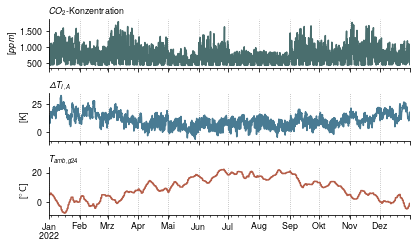

In [ ]:
df = RESULTS.getRandom('FensterModel', choice='LogReg')
fig, axs = plt.subplots(3,1, **style.size(.6), sharex=True)
ax = df['CO2 [ppm]', 'Wohnen'].plot(ax=axs[0], color=style.green)
ax.set(title=r'$CO_2$-Konzentration', ylabel=r'$[ppm]$')
ax.grid(axis='x')
ax = (df['Tair [C]', 'Wohnen'] - df['Tamb [C]', 'Amb']).plot(ax=axs[1])
ax.set(title=r'$\Delta T_{I,A}$', ylabel=r'$[\si{\kelvin}]$')
ax.grid(axis='x')
ax = df['Tamb_g24 [C]', 'Amb'].plot(ax=axs[2], color=style.red)
ax.set(title=r'$T_{amb,g24}$', ylabel=r'$[\si{\celsius}]$', xlabel='')
ax.grid(axis='x')
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
fig.tight_layout()

exportiere die zuletzt verwendete Figure...


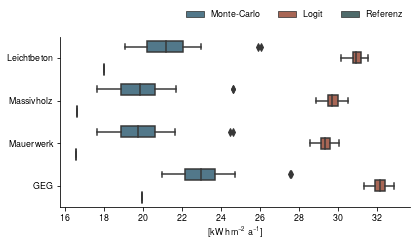

In [ ]:
fig = plt.figure(**style.size(.6))
ax = sns.boxplot(data=RESULTS.Summary.replace(style.NAMES), y='bui', x='QHEAT',hue='FensterModel')
ax.legend(title=None, bbox_to_anchor=(1,1.2), loc='upper right', ncol=3)
ax.set(ylabel=None, xlabel=r'[\si{\kilo\watt\hour\per\square\metre\per\year}]')
fig.tight_layout()

<bound method Figure.tight_layout of <Figure size 422.362x168.945 with 1 Axes>>

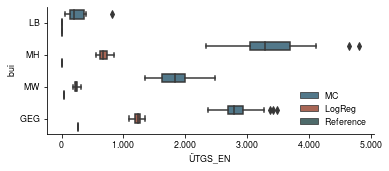

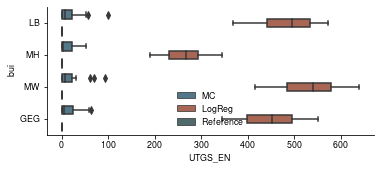

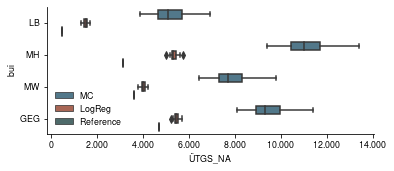

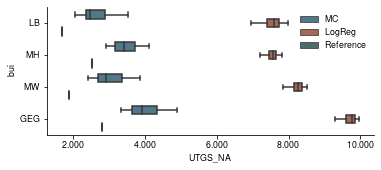

In [ ]:
fig = plt.figure(**style.size(.4))
ax = sns.boxplot(data=RESULTS.Summary, y='bui', x='ÜTGS_EN', hue='FensterModel')
ax.legend(title=None)
fig.tight_layout

fig = plt.figure(**style.size(.4))
ax = sns.boxplot(data=RESULTS.Summary, y='bui', x='UTGS_EN', hue='FensterModel')
ax.legend(title=None)
fig.tight_layout

fig = plt.figure(**style.size(.4))
ax = sns.boxplot(data=RESULTS.Summary, y='bui', x='ÜTGS_NA', hue='FensterModel')
ax.legend(title=None)
fig.tight_layout

fig = plt.figure(**style.size(.4))
ax = sns.boxplot(data=RESULTS.Summary, y='bui', x='UTGS_NA', hue='FensterModel')
ax.legend(title=None)
fig.tight_layout

In [ ]:
df = RESULTS.getValue('ACR_sv1 [1/h]', Airnode='Wohnen').droplevel(1,axis=1).gt(0).resample('D').sum().groupby([RESULTS.VariantCollection.bui, RESULTS.VariantCollection.FensterModel], axis=1).mean().mean().unstack().round(2)
fig = plt.figure(**style.size(aspect=0.25))
ax = sns.heatmap(data=df.rename(columns=style.NAMES, index=style.NAMES).round(1), cmap=style.HEATMAP, center=0, annot=True, fmt='.3n', cbar_kws=dict(label=r'[\si{1\per\hour}]'))
ax.set(ylabel=None, xlabel=None)
ax.tick_params(axis='y', rotation=0)
fig.tight_layout()

FensterModel,LogReg,MC,Reference
bui,,,
GEG,14.800000,3.390000,2.000000
LB,14.810000,3.390000,2.000000
MH,14.710000,3.390000,2.000000
MW,14.790000,3.390000,2.000000


In [ ]:
RESULTS.variables.append('ACR_SV')

exportiere die zuletzt verwendete Figure...


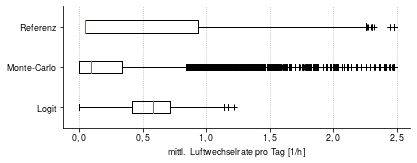

In [ ]:
data = {kind: group.stack().droplevel(1).to_numpy() for kind, group in RESULTS.getValue('ACR_SV', Airnode='Wohnen').resample('D').mean().droplevel(1, axis=1).groupby(RESULTS.Summary.replace(style.NAMES).FensterModel, axis=1)}
fig, ax = plt.subplots(**style.size(.4))
ax.boxplot(x = data.values(), labels=data.keys(), vert=False, sym='+')
ax.grid(axis='x')
ax.set(ylabel=None, xlabel=r'mittl. Luftwechselrate pro Tag [\si{1\per\hour}]')
fig.tight_layout()

exportiere die zuletzt verwendete Figure...


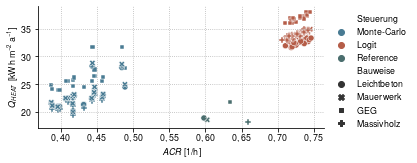

In [ ]:
df = RESULTS.getValue(['ACR_tot [1/h]', 'Q_tot_ht [W/m2]'], Airnode='Wohnen').agg(['mean', 'sum']).stack(0).unstack(0).rename(columns= lambda x: x.split(' ')[0])[[('ACR_tot', 'mean'), ('Q_tot_ht', 'sum')]].droplevel(1, axis=1).join(RESULTS.Summary[['FensterModel', 'bui']])
df['Q_tot_ht'] /= 1000
df = df.rename(columns={'FensterModel': 'Steuerung', 'bui': 'Bauweise'}).replace(style.NAMES)
fig = plt.figure(**style.size(.4))
ax = sns.scatterplot(data=df, x='ACR_tot', y='Q_tot_ht', hue='Steuerung', style='Bauweise')
ax.grid()
ax.legend(title=None, bbox_to_anchor=(1,1), loc='upper left')
ax.legend
ax.set(ylabel=r'$Q_{HEAT}$ [\si{\kilo\watt\hour\per\square\metre\per\year}]', xlabel=r'$ACR$ [\si{1\per\hour}]')
fig.tight_layout()

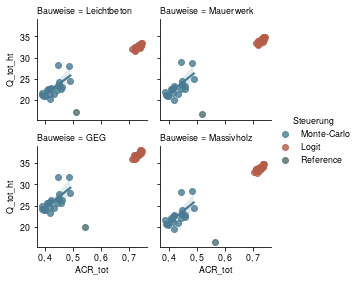

In [ ]:
sns.lmplot(data=df, x='ACR_tot', y='Q_tot_ht', hue='Steuerung', col='Bauweise', height=2, aspect=1, col_wrap=2)

MC, LB: 0.45 1/h
MC, LB: 23.2 kWh/m²*a


exportiere die zuletzt verwendete Figure...


LogReg, LB: 0.73 1/h
LogReg, LB: 32.6 kWh/m²*a


exportiere die zuletzt verwendete Figure...


Reference, LB: 0.6 1/h
Reference, LB: 19.0 kWh/m²*a


exportiere die zuletzt verwendete Figure...


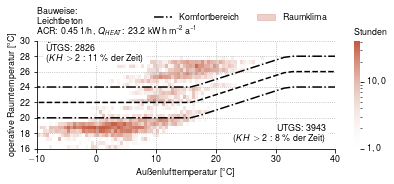

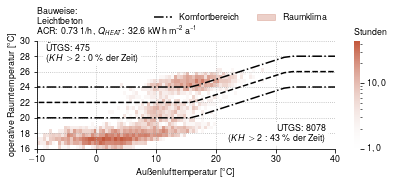

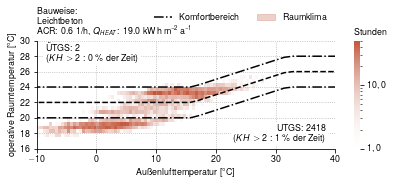

In [ ]:
Vergleich = RESULTS.getRandom('FensterModel', where=(lambda s: s.bui == 'LB'), Airnode=['Wohnen', 'Amb'])
for model, df in Vergleich.items():
    varname = df.columns.get_level_values(0).unique()[0]
    bui = RESULTS.Summary.at[varname, 'bui']
    df = df.droplevel(0, axis=1)

    print(f"{model}, {bui}: {df['ACR_tot [1/h]', 'Wohnen'].mean():.2} 1/h")
    print(f"{model}, {bui}: {df['Q_tot_ht [W/m2]', 'Wohnen'].sum()/1000:.3} kWh/m²*a")

    _top = df['Top [C]', 'Wohnen'].between_time('18:00', '08:00')
    _tamb = df['Tamb [C]'].between_time('18:00', '08:00')
    _tair = df['Tair [C]', 'Wohnen'].between_time('18:00', '08:00')
    _rH = df['Rh [%]', 'Wohnen'].between_time('18:00', '08:00')
    _title = f'Bauweise:\n{style.NAMES[bui]}\n ACR: {df["ACR_tot [1/h]", "Wohnen"].mean():.2} \\si{{1\\per\\hour}}, $Q_{{HEAT}}$: {df["Q_tot_ht [W/m2]", "Wohnen"].sum()/1000:.3} \\si{{\\kilo\\watt\\hour\\per\\square\\metre\\per\\year}}'

    fig, ax = plt.subplots(**style.size(.45))
    hx = tb.comf.hxdiagramm(rh=_rH, temp=_tair,ax=ax, kind='hist', title=_title , label=model)

    fig, ax = plt.subplots(**style.size(.45))
    tb.comf.adaptive_comfort_NA(Tamb=_tamb, Top=_top, ax=ax, kind='hist', scale='log', title=_title)

    fig, ax = plt.subplots(**style.size(.45))
    tb.comf.adaptive_comfort_EN(Tamb=_tamb, Top=_top, ax=ax, kind='hist', scale='log', title=f'Bauweise: {style.NAMES[bui]}')


exportiere die zuletzt verwendete Figure...


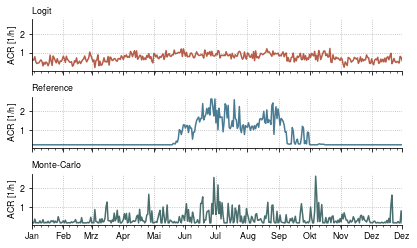

In [ ]:
fig, ax = plt.subplots(**style.size(0.6))
Vergleich = RESULTS.getRandom('FensterModel', where=(lambda s: s.bui == 'LB'), Airnode=['Wohnen', 'Amb'])
data = pd.concat(Vergleich, axis=1).filter(like='ACR_tot').resample('D').mean().droplevel([1,2,3], axis=1).rename(columns=style.NAMES)
data.plot(ax=ax, subplots=True, ylabel=r'ACR [\si{1\per\hour}]', grid='x', xlabel='', title=list(data.columns), sharex=True, sharey=True, legend=False, color={'Logit':style.red, 'Reference':style.blue, 'Monte-Carlo':style.green})
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
fig.tight_layout()

exportiere die zuletzt verwendete Figure...


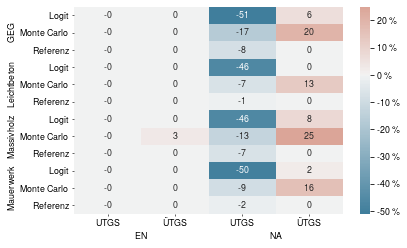

In [ ]:
data = RESULTS.Kelvinstunden.between_time('18:00', '08:00').loc[:,pd.IndexSlice[:,'Wohnen',:]].gt(2).sum().div((14/24)*87.60).unstack(0).droplevel(0).T.groupby([RESULTS.Summary.bui, RESULTS.Summary.FensterModel]).mean().rename(columns=lambda x: '-'.join(reversed(x.split('_'))), index=style.NAMES).round(0)
data.loc[:,data.filter(like='UTGS').columns] *= -1
fig = plt.figure(**style.size(aspect=0.6))
ax = sns.heatmap(data=data, cmap=style.HEATMAP, center=0, annot=True, fmt='4n', cbar_kws=dict(format=mpl.ticker.StrMethodFormatter(r'{x:1n} \%')))
style.cleanBuiAppAxis(ax)
style.cleanBuiAppAxis(ax, 'y')
ax.tick_params(axis='y', which='major', length=55)
fig.tight_layout()

exportiere die zuletzt verwendete Figure...


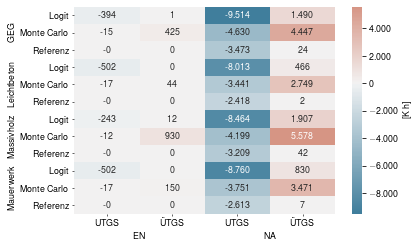

In [ ]:
data = RESULTS.Kelvinstunden.between_time('18:00', '08:00').loc[:,pd.IndexSlice[:,'Wohnen',:]].sum().unstack(0).droplevel(0).T.groupby([RESULTS.Summary.bui, RESULTS.Summary.FensterModel]).mean().rename(columns=lambda x: '-'.join(reversed(x.split('_'))), index=style.NAMES).round(0)
data.loc[:,data.filter(like='UTGS').columns] *= -1
fig = plt.figure(**style.size(aspect=0.6))
ax = sns.heatmap(data=data, cmap=style.HEATMAP, center=0, annot=True, fmt='4n', cbar_kws=dict(label=r'[\si{\kelvin\hour}]'))
style.cleanBuiAppAxis(ax)
style.cleanBuiAppAxis(ax, 'y')
ax.tick_params(axis='y', which='major', length=55)
fig.tight_layout()